# 🏀 NBA Team Points Prediction Model
🔬 **Data Exploring (Advanced features)**
---    
🙋 **authors**: szymond44, gwiazdan  
📆 **date**: 21-07-2025  


In [ ]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
%matplotlib inline
%load_ext autoreload
%autoreload 2
from data import ApiFetcher
api = ApiFetcher(2019, 2025)
df = api.get_dataframe('boxscoreadvanced')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ✨ Introduction

📊 **Dataset Overview**  

In [21]:
print(f"Number of matches: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("Features in the dataset: ")
columns = df.columns.tolist()
for i in range(0, len(columns), 4):
    row_cols = columns[i:i+4]
    print("  " + " | ".join(f"{col:<15}" for col in row_cols))

Number of matches: 7054
Number of features: 52
Features in the dataset: 
  game_id         | home_team_id    | away_team_id    | home_minutes   
  home_est_off_rating | home_off_rating | home_est_def_rating | home_def_rating
  home_est_net_rating | home_net_rating | home_ast_pct    | home_ast_to    
  home_ast_ratio  | home_oreb_pct   | home_dreb_pct   | home_reb_pct   
  home_est_tov_pct | home_tov_ratio  | home_efg_pct    | home_ts_pct    
  home_usg_pct    | home_est_usg_pct | home_est_pace   | home_pace      
  home_pace_per40 | home_possessions | home_pie        | away_minutes   
  away_est_off_rating | away_off_rating | away_est_def_rating | away_def_rating
  away_est_net_rating | away_net_rating | away_ast_pct    | away_ast_to    
  away_ast_ratio  | away_oreb_pct   | away_dreb_pct   | away_reb_pct   
  away_est_tov_pct | away_tov_ratio  | away_efg_pct    | away_ts_pct    
  away_usg_pct    | away_est_usg_pct | away_est_pace   | away_pace      
  away_pace_per40 | away_possessio

🏀 **Advanced Features Analyzed:**

📅 **Game Context:**
- **game_id** - Unique identifier for each game
- **date** - Date of the game

🎯 **Team Identification:**
- **_team_id** - Unique identifier for each team

⏱️ **Game Flow:**
- **_minutes** - Total minutes played by team
- **_possessions** - Number of possessions (key for pace calculation)
- **_pace** - Possessions per 48 minutes (game speed)
- **_pace_per40** - Possessions per 40 minutes
- **_est_pace** - Estimated pace metric

🎯 **Offensive Efficiency:**
- **_off_rating** - Points scored per 100 possessions
- **_est_off_rating** - Estimated offensive rating
- **_efg_pct** - Effective Field Goal Percentage (adjusts for 3PT value)
- **_ts_pct** - True Shooting Percentage (includes FTs)
- **_usg_pct** - Usage Percentage (team possession usage) **(useless for teams as sum is always 100%)**
- **_est_usg_pct** - Estimated usage percentage

🛡️ **Defensive Efficiency:**
- **_def_rating** - Points allowed per 100 possessions
- **_est_def_rating** - Estimated defensive rating

📊 **Net Performance:**
- **_net_rating** - Point differential per 100 possessions (off - def)
- **_est_net_rating** - Estimated net rating

🏀 **Rebounding Control:**
- **_oreb_pct** - Offensive Rebound Percentage
- **_dreb_pct** - Defensive Rebound Percentage  
- **_reb_pct** - Total Rebound Percentage

⚡ **Playmaking & Ball Security:**
- **_ast_pct** - Assist Percentage (assists on made baskets)
- **_ast_to** - Assist-to-Turnover Ratio
- **_ast_ratio** - Assist Ratio (assists per 100 possessions)
- **_tov_pct** - Turnover Percentage
- **_est_tov_pct** - Estimated turnover percentage
- **_tov_ratio** - Turnover Ratio

🎯 **Overall Impact:**
- **_pie** - Player Impact Estimate (comprehensive efficiency metric)

> 📝 **Note:** Each advanced metric appears as **home_** and **away_** columns. These features represent modern NBA analytics focused on per-possession efficiency rather than raw counting stats.

## 📈🔗 Correlation and Covariation exploration 

In [22]:
print(df.columns)

Index(['game_id', 'home_team_id', 'away_team_id', 'home_minutes',
       'home_est_off_rating', 'home_off_rating', 'home_est_def_rating',
       'home_def_rating', 'home_est_net_rating', 'home_net_rating',
       'home_ast_pct', 'home_ast_to', 'home_ast_ratio', 'home_oreb_pct',
       'home_dreb_pct', 'home_reb_pct', 'home_est_tov_pct', 'home_tov_ratio',
       'home_efg_pct', 'home_ts_pct', 'home_usg_pct', 'home_est_usg_pct',
       'home_est_pace', 'home_pace', 'home_pace_per40', 'home_possessions',
       'home_pie', 'away_minutes', 'away_est_off_rating', 'away_off_rating',
       'away_est_def_rating', 'away_def_rating', 'away_est_net_rating',
       'away_net_rating', 'away_ast_pct', 'away_ast_to', 'away_ast_ratio',
       'away_oreb_pct', 'away_dreb_pct', 'away_reb_pct', 'away_est_tov_pct',
       'away_tov_ratio', 'away_efg_pct', 'away_ts_pct', 'away_usg_pct',
       'away_est_usg_pct', 'away_est_pace', 'away_pace', 'away_pace_per40',
       'away_possessions', 'away_pie', 'date

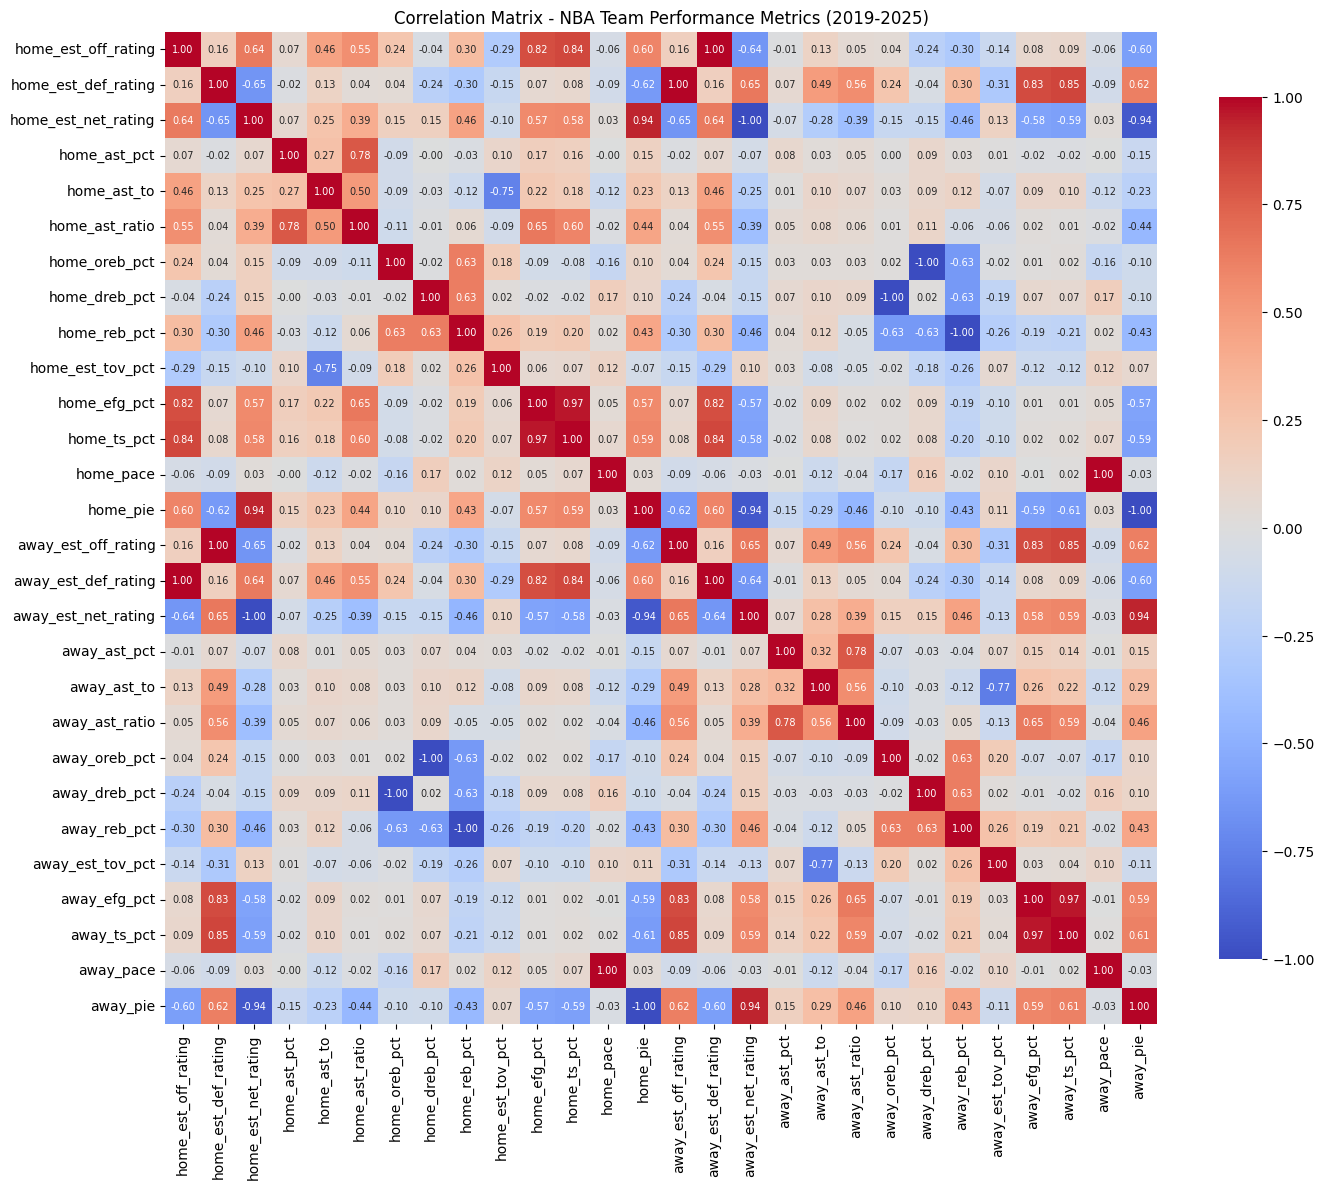

In [ ]:
numeric_cols_names = [
    'est_off_rating', 'est_def_rating', 'est_net_rating', 
    'ast_pct', 'ast_to', 'ast_ratio', 
    'oreb_pct', 'dreb_pct', 'reb_pct', 
    'est_tov_pct', 'efg_pct', 'ts_pct', 'pace', 'pie'
]
numeric_cols = ['home_' + c for c in numeric_cols_names] + ['away_' + c for c in numeric_cols_names]
df0 = df[numeric_cols]

plt.figure(figsize=(16, 16))
correlation_matrix = df0.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7}, annot_kws={"size": 7})
plt.title("Correlation Matrix - NBA Team Performance Metrics (2019-2025)")
plt.show();

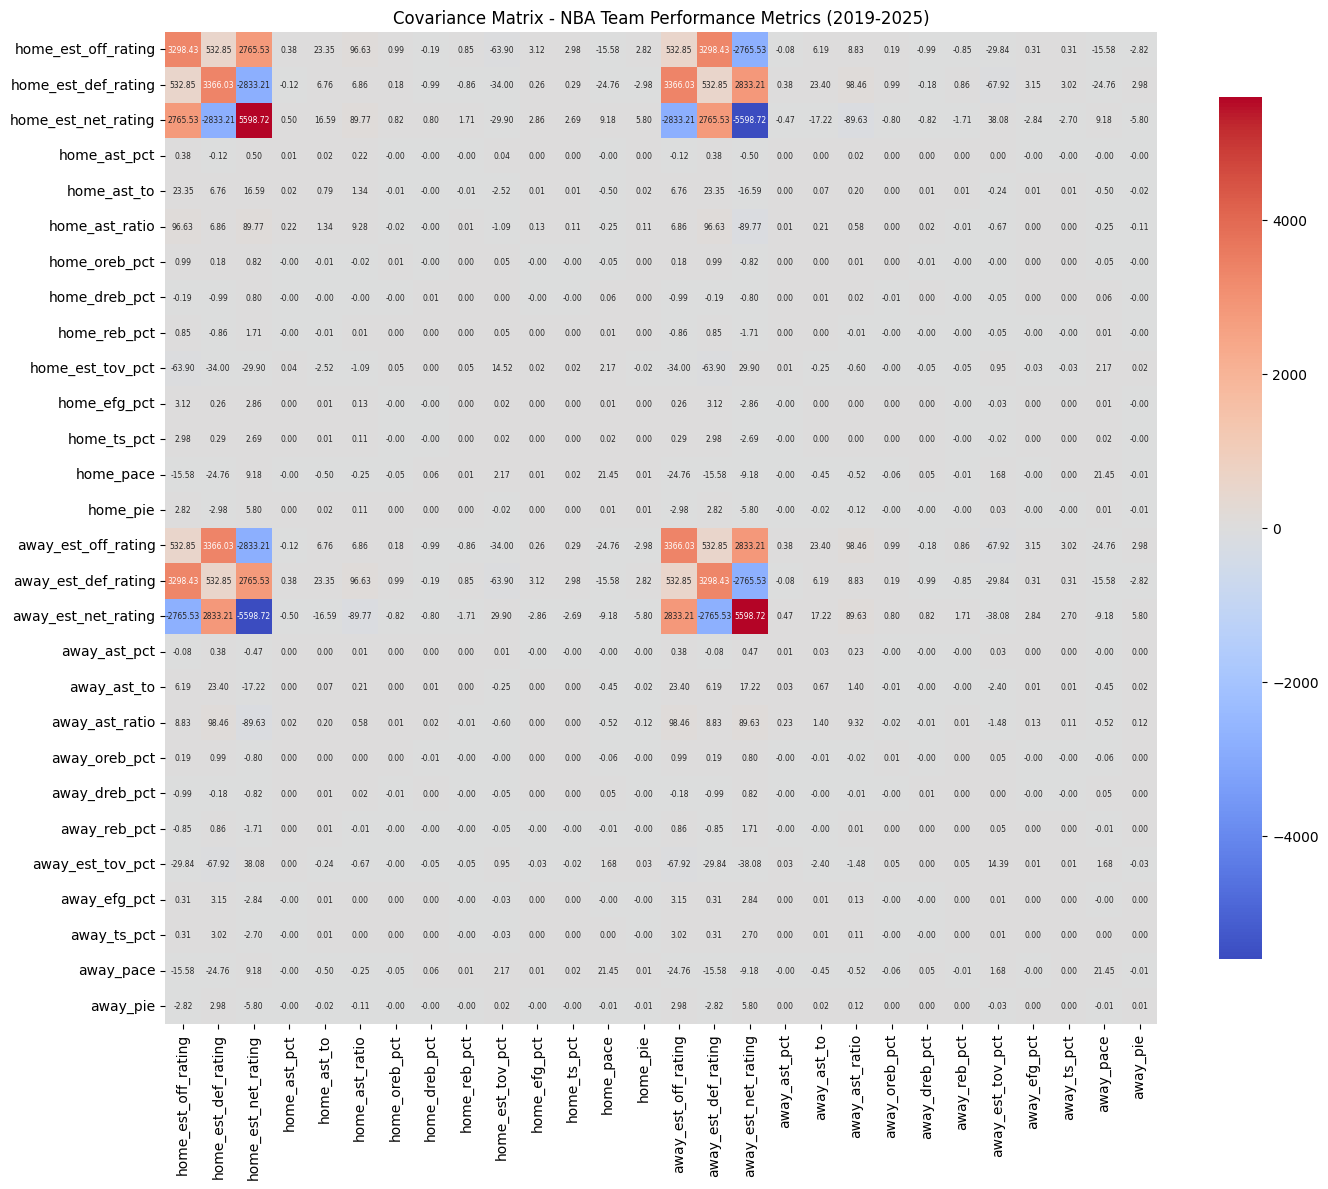

In [24]:
covariance_matrix = df0.cov()
plt.figure(figsize=(16, 16))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7}, annot_kws={"size": 5.5})
plt.title("Covariance Matrix - NBA Team Performance Metrics (2019-2025)")
plt.show();

In [27]:
correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append({
                'feature1': correlation_matrix.columns[i],
                'feature2': correlation_matrix.columns[j], 
                'correlation': corr_value
            })
high_corr_pairs.sort(key=lambda x: abs(x['correlation']), reverse=True)

In [ ]:
print("🔍 Feature Selection Strategy based on correlations:")
print("=" * 60)

feature_groups = {}
processed = set()

for pair in high_corr_pairs:
    f1, f2 = pair['feature1'], pair['feature2']
    corr = pair['correlation']
    
    if f1 not in processed and f2 not in processed:
        group_name = f"Group_{len(feature_groups)+1}"
        feature_groups[group_name] = [f1, f2]
        processed.update([f1, f2])
        print(f"📊 {group_name}: {f1} ↔ {f2} (r={corr:.3f})")

print(f"\n🎯 Recommended features to KEEP (one from each group):")
print("-" * 50)

keep_features = []
remove_features = []

for group_name, features in feature_groups.items():
    if 'est_' in features[0] and 'est_' not in features[1]:
        keep = features[1]
        remove = features[0]
    elif 'est_' in features[1] and 'est_' not in features[0]:
        keep = features[0] 
        remove = features[1]
    else:
        keep = features[0]
        remove = features[1]
    
    keep_features.append(keep)
    remove_features.append(remove)
    print(f"✅ KEEP: {keep}")
    print(f"❌ DROP: {remove}")
    print()

print(f"📋 Final recommendation:")
print(f"   Keep: {len(keep_features)} features")  
print(f"   Drop: {len(remove_features)} features")
print(f"   Reduction: {len(remove_features)/(len(keep_features)+len(remove_features))*100:.1f}%")

🔍 Feature Selection Strategy based on correlations:
📊 Group_1: home_est_off_rating ↔ away_est_def_rating (r=1.000)
📊 Group_2: home_est_def_rating ↔ away_est_off_rating (r=1.000)
📊 Group_3: home_est_net_rating ↔ away_est_net_rating (r=-1.000)
📊 Group_4: home_pace ↔ away_pace (r=1.000)
📊 Group_5: home_pie ↔ away_pie (r=-1.000)
📊 Group_6: home_dreb_pct ↔ away_oreb_pct (r=-1.000)
📊 Group_7: home_oreb_pct ↔ away_dreb_pct (r=-1.000)
📊 Group_8: home_reb_pct ↔ away_reb_pct (r=-1.000)
📊 Group_9: away_efg_pct ↔ away_ts_pct (r=0.969)
📊 Group_10: home_efg_pct ↔ home_ts_pct (r=0.969)

🎯 Recommended features to KEEP (one from each group):
--------------------------------------------------
✅ KEEP: home_est_off_rating
❌ DROP: away_est_def_rating

✅ KEEP: home_est_def_rating
❌ DROP: away_est_off_rating

✅ KEEP: home_est_net_rating
❌ DROP: away_est_net_rating

✅ KEEP: home_pace
❌ DROP: away_pace

✅ KEEP: home_pie
❌ DROP: away_pie

✅ KEEP: home_dreb_pct
❌ DROP: away_oreb_pct

✅ KEEP: home_oreb_pct
❌ DROP

## 🔍 Key Findings from Correlation Analysis

### **Perfect Correlations (r = ±1.0):**
- **Game-level metrics**: `pace`, `net_rating`, `pie` are identical for both teams (zero-sum game)
- **Rebounding**: `home_dreb_pct` ↔ `away_oreb_pct` (defensive rebounds = missed offensive attempts)
- **Efficiency ratings**: Perfect mathematical relationships between offensive/defensive metrics

### **Strong Feature Redundancy (r = 0.97):**
- **Shooting efficiency**: `efg_pct` and `ts_pct` measure very similar concepts
- Both account for shooting accuracy but `ts_pct` includes free throws

### **Feature Selection Strategy:**
1. **Keep home-team perspective** for most metrics (consistent viewpoint)
2. **Eliminate mathematical duplicates** (pace, rebounds, net ratings)  
3. **Choose interpretable metrics** (`efg_pct` over `ts_pct` for simplicity)
4. **50% dimensionality reduction** while preserving all information

### **Basketball Insights:**
- NBA games are **zero-sum**: one team's success = opponent's failure
- **Rebounding percentages** are mathematically linked (missed shots become rebounds)
- **Advanced metrics** often capture the same underlying performance

> 📝 **Result**: From 28 features → 14 features with **no information loss**, eliminating multicollinearity issues for better model performance.